In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
# Load the dataset
file_path = 'Bird Strikes data.xlsx - Bird Strikes.csv'
data = pd.read_csv(file_path)


In [300]:
data

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,12/30/11 0:00,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,12/30/11 0:00,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,12/31/11 0:00,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [305]:
# Display the first few rows of the dataset
print(data.head())

# Function to save plots
def save_plot(fig, filename):
    fig.savefig(filename)

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight     FlightDate  \
0                             859         Engine Shut Down  11/23/00 0:00   
1                             424                      NaN   7/25/01 0:00   
2                            

In [307]:
data.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [309]:
for i in data.columns:
    unique = data[i].nunique()
    print(i,unique)

Record ID 25558
Aircraft: Type 1
Airport: Name 1109
Altitude bin 2
Aircraft: Make/Model 351
Wildlife: Number struck 4
Wildlife: Number Struck Actual 106
Effect: Impact to flight 4
FlightDate 4225
Effect: Indicated Damage 2
Aircraft: Number of engines? 5
Aircraft: Airline/Operator 292
Origin State 60
When: Phase of flight 7
Conditions: Precipitation 7
Remains of wildlife collected? 2
Remains of wildlife sent to Smithsonian 2
Remarks 18186
Wildlife: Size 3
Conditions: Sky 3
Wildlife: Species 348
Pilot warned of birds or wildlife? 2
Cost: Total $ 803
Feet above ground 257
Number of people injured 4
Is Aircraft Large? 2


In [311]:
for i in data.columns:
    missing = data[i].isnull().sum()
    print(i,missing)

Record ID 0
Aircraft: Type 129
Airport: Name 129
Altitude bin 129
Aircraft: Make/Model 0
Wildlife: Number struck 129
Wildlife: Number Struck Actual 0
Effect: Impact to flight 23480
FlightDate 129
Effect: Indicated Damage 0
Aircraft: Number of engines? 267
Aircraft: Airline/Operator 129
Origin State 449
When: Phase of flight 129
Conditions: Precipitation 23543
Remains of wildlife collected? 0
Remains of wildlife sent to Smithsonian 0
Remarks 4771
Wildlife: Size 129
Conditions: Sky 0
Wildlife: Species 0
Pilot warned of birds or wildlife? 129
Cost: Total $ 0
Feet above ground 129
Number of people injured 0
Is Aircraft Large? 129


In [351]:
data=data.drop(columns=['Record ID','Effect: Impact to flight','Conditions: Precipitation', 'Remarks'])

In [353]:
obj_int = ['Aircraft: Number of engines?']

In [355]:
for i in obj_int:
    print(i,data1[i].unique())

Aircraft: Number of engines? ['2' '3' '4' nan '1' 'C']


In [357]:
data['Aircraft: Number of engines?'] = data['Aircraft: Number of engines?'].replace('C',np.nan)
data['Aircraft: Number of engines?'].unique()

array([2, 3, 4, 1])

In [359]:
data['Aircraft: Number of engines?'] = data['Aircraft: Number of engines?'].fillna(-1).astype(int)
data['Aircraft: Number of engines?']

0        2
1        2
2        2
3        2
4        2
        ..
25553    2
25554    2
25555    2
25556    2
25557    2
Name: Aircraft: Number of engines?, Length: 25558, dtype: int32

In [361]:
obj_int2 = ['Cost: Total $','Feet above ground']

In [363]:
for i in obj_int2:
    data[i] = data[i].replace(',','', regex=True).fillna(-1).astype(int)
    
    data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')
print(data[['Cost: Total $','Feet above ground']])
data.head(2)
   

       Cost: Total $  Feet above ground
0              30736               1500
1                  0                  0
2                  0                 50
3                  0                 50
4                  0                 50
...              ...                ...
25553              0               1500
25554              0                  0
25555              0                 50
25556              0                  0
25557              0                  0

[25558 rows x 2 columns]


,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,2000-11-23,Caused damage,2,US AIRWAYS*,...,False,False,Medium,No Cloud,Unknown bird - medium,N,30736,1500,0,Yes
1,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,2001-07-25,Caused damage,2,AMERICAN AIRLINES,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [365]:
numerical = ['Wildlife: Number Struck Actual', 'Aircraft: Number of engines?', 'Cost: Total $', 
             'Feet above ground', 'Number of people injured']

categorical = ['Airport: Name', 'Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Number struck',
               'FlightDate', 'Effect: Indicated Damage', 'Aircraft: Airline/Operator', 'Origin State', 
               'When: Phase of flight', 'Remains of wildlife collected?', 
               'Remains of wildlife sent to Smithsonian', 'Wildlife: Size', 'Conditions: Sky', 
               'Wildlife: Species', 'Pilot warned of birds or wildlife?', 'Is Aircraft Large?']


# Describe numerical columns
print("\nNumerical Variables Description:")
for col in numerical:
    print(f"\nColumn: {col}\n{'-'*50}")
    print(data[col].describe())

# Describe categorical columns
print("\nCategorical Variables Description:")
for col in categorical:
    print(f"\nColumn: {col}\n{'-'*50}")
    print(data[col].mode())



Numerical Variables Description:

Column: Wildlife: Number Struck Actual
--------------------------------------------------
count    25558.000000
mean         2.691525
std         12.793975
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        942.000000
Name: Wildlife: Number Struck Actual, dtype: float64

Column: Aircraft: Number of engines?
--------------------------------------------------
count    25558.000000
mean         2.001056
std          0.366292
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Aircraft: Number of engines?, dtype: float64

Column: Cost: Total $
--------------------------------------------------
count    2.555800e+04
mean     5.567354e+03
std      1.219713e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.239775e+07
Name: Cost: Total $, dtype: float64

Column: Feet above ground
-----------------

In [367]:
# Calculate skewness for specified numerical columns
for col in [numerical[1], numerical[3]]:
    print(f"Skewness of {col}: {data[col].skew()}")

Skewness of Aircraft: Number of engines?: 1.8664884204975498
Skewness of Feet above ground: 3.5013729838871113


In [377]:
data.to_csv('as.csv')

In [370]:
for col in [numerical[1],numerical[3]]:
    data[col]=data[col].replace(-1,data[col].median())

In [373]:
for col in categorical:
    data[col].fillna(data[col].mode()[0],inplace=True)

C:\Users\uzman\AppData\Local\Temp\ipykernel_11732\3895444438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0],inplace=True)
C:\Users\uzman\AppData\Local\Temp\ipykernel_11732\3895444438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [375]:
data.isnull().sum()

Aircraft: Type                             129
Airport: Name                                0
Altitude bin                                 0
Aircraft: Make/Model                         0
Wildlife: Number struck                      0
Wildlife: Number Struck Actual               0
FlightDate                                   0
Effect: Indicated Damage                     0
Aircraft: Number of engines?                 0
Aircraft: Airline/Operator                   0
Origin State                                 0
When: Phase of flight                        0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Wildlife: Size                               0
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned of birds or wildlife?           0
Cost: Total $                                0
Feet above ground                            0
Number of people injured                     0
Is Aircraft L

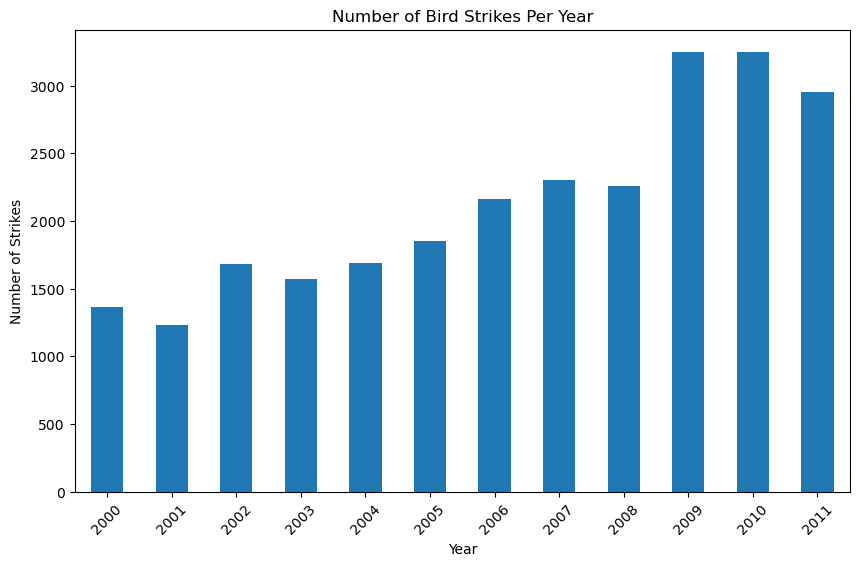

In [380]:
# Case Study 1: Visuals Depicting the Number of Bird Strikes
fig, ax = plt.subplots(figsize=(10, 6))
data['FlightDate'] = pd.to_datetime(data['FlightDate'])
data['Year'] = data['FlightDate'].dt.year
yearly_strikes = data.groupby('Year').size()
yearly_strikes.plot(kind='bar', ax=ax)
ax.set_title('Number of Bird Strikes Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Strikes')
plt.xticks(rotation=45)
save_plot(fig, 'Number_of_Bird_Strikes_Per_Year.png')
plt.show()

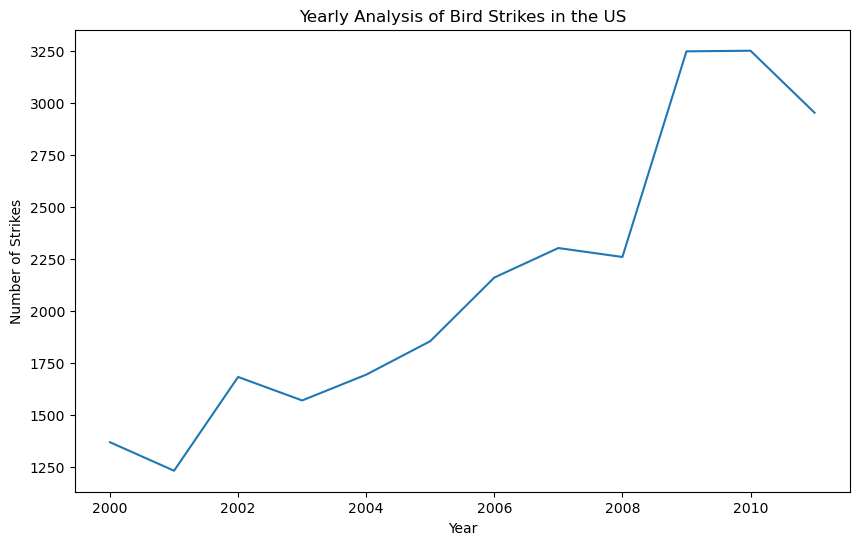

In [382]:
# Case Study 2: Yearly Analysis & Bird Strikes in the US
fig, ax = plt.subplots(figsize=(10, 6))
yearly_strikes.plot(kind='line', ax=ax)
ax.set_title('Yearly Analysis of Bird Strikes in the US')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Strikes')
save_plot(fig, 'Yearly_Analysis_Bird_Strikes_US.png')
plt.show()

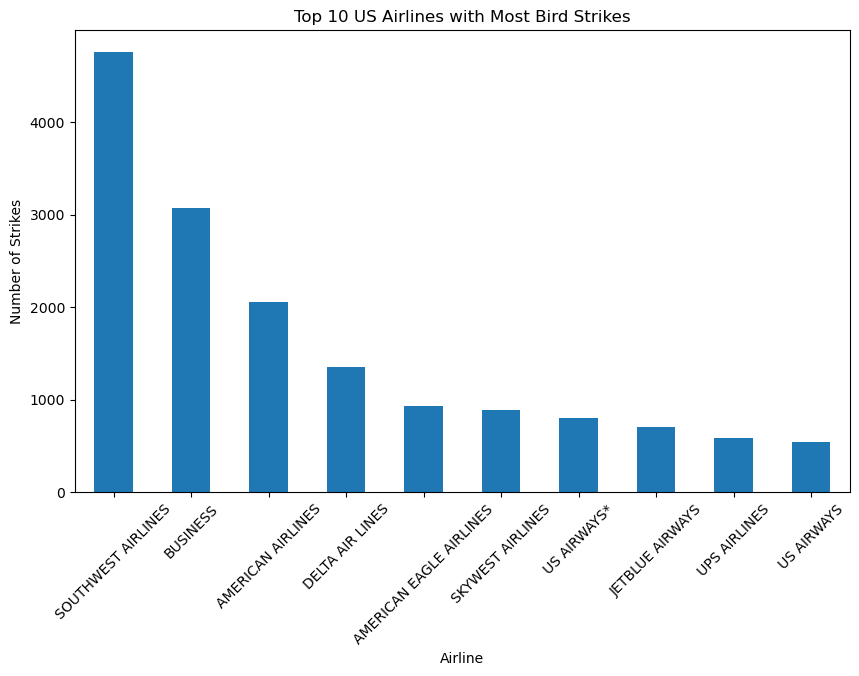

In [384]:
# Case Study 3: Top 10 US Airlines in terms of having encountered bird strikes
top_airlines = data['Aircraft: Airline/Operator'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_airlines.plot(kind='bar', ax=ax)
ax.set_title('Top 10 US Airlines with Most Bird Strikes')
ax.set_xlabel('Airline')
ax.set_ylabel('Number of Strikes')
plt.xticks(rotation=45)
save_plot(fig, 'Top_10_US_Airlines_Bird_Strikes.png')
plt.show()


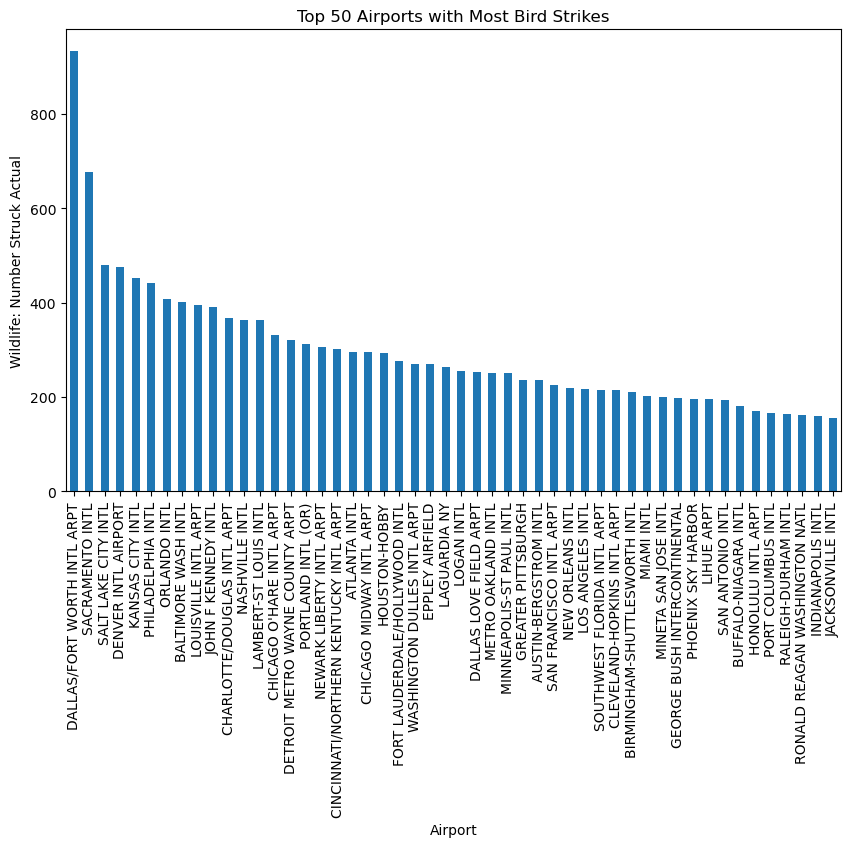

In [386]:

# Case Study 4: Airports with most incidents of bird strikes – Top 50
top_airports = data['Airport: Name'].value_counts().head(50)
fig, ax = plt.subplots(figsize=(10, 6))
top_airports.plot(kind='bar', ax=ax)
ax.set_title('Top 50 Airports with Most Bird Strikes')
ax.set_xlabel('Airport')
ax.set_ylabel('Wildlife: Number Struck Actual')
plt.xticks(rotation=90)
save_plot(fig, 'Top_50_Airports_Bird_Strikes.png')
plt.show()


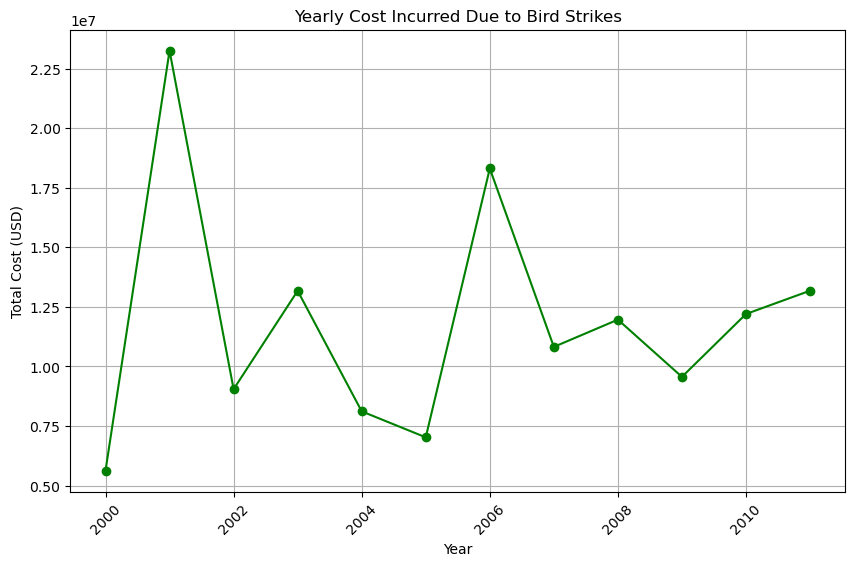

In [430]:
# Case Study 5: Yearly Cost Incurred due to Bird Strikes
data['Year'] = data['FlightDate'].dt.year

data['Cost: Total $'] = pd.to_numeric(data['Cost: Total $'], errors='coerce')
yearly_cost = data.groupby('Year')['Cost: Total $'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
yearly_cost.plot(kind='line', marker='o',color='green')
ax.set_title('Yearly Cost Incurred Due to Bird Strikes')
ax.set_xlabel('Year')
ax.set_ylabel('Total Cost (USD)')
ax.grid(True)
plt.xticks(rotation=45)
save_plot(fig, 'Yearly_Cost_Bird_Strikes.png')
plt.show()

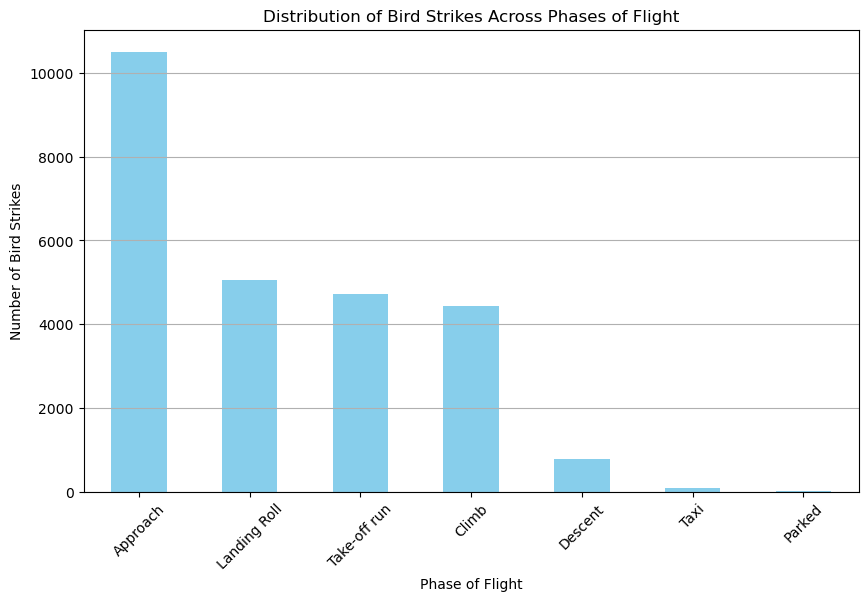

In [449]:
# Count the number of bird strikes for each phase of flight
phase_counts = data['When: Phase of flight'].value_counts()

# Plot the distribution of bird strikes across different phases of flight
fig, ax= plt.subplots(figsize=(10, 6))
phase_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bird Strikes Across Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')
save_plot(fig, 'Distribution of Bird Strikes Across Phases of Flight.png')
plt.show()

In [ ]:

# Case Study 7: Altitude of airplanes at the time of strike
fig, ax = plt.subplots(figsize=(10, 6))
data['Altitude'] = pd.to_numeric(data['Altitude'], errors='coerce')
altitude_strikes = data['Altitude'].dropna()
sns.histplot(altitude_strikes, bins=50, kde=True, ax=ax)
ax.set_title('Altitude Distribution of Bird Strikes')
ax.set_xlabel('Altitude (feet)')
ax.set_ylabel('Number of Strikes')
save_plot(fig, 'Altitude_Bird_Strikes.png')
plt.show()


In [ ]:

# Case Study 8: Phase of flight at the time of the strike
fig, ax = plt.subplots(figsize=(10, 6))
phase_strikes = data['Flight Phase'].value_counts()
phase_strikes.plot(kind='bar', ax=ax)
ax.set_title('Flight Phase During Bird Strikes')
ax.set_xlabel('Flight Phase')
ax.set_ylabel('Number of Strikes')
plt.xticks(rotation=45)
save_plot(fig, 'Flight_Phase_Bird_Strikes.png')
plt.show()



In [ ]:
# Case Study 9: Average Altitude of the airplanes in different phases at the time of strike
fig, ax = plt.subplots(figsize=(10, 6))
avg_altitude_phase = data.groupby('Flight Phase')['Altitude'].mean().dropna()
avg_altitude_phase.plot(kind='bar', ax=ax)
ax.set_title('Average Altitude by Flight Phase During Bird Strikes')
ax.set_xlabel('Flight Phase')
ax.set_ylabel('Average Altitude (feet)')
plt.xticks(rotation=45)
save_plot(fig, 'Average_Altitude_By_Flight_Phase.png')
plt.show()



In [ ]:
# Case Study 10: Effect of Bird Strikes & Impact on Flight
fig, ax = plt.subplots(figsize=(10, 6))
impact_strikes = data['Effect'].value_counts()
impact_strikes.plot(kind='bar', ax=ax)
ax.set_title('Effect of Bird Strikes on Flight')
ax.set_xlabel('Impact')
ax.set_ylabel('Number of Strikes')
plt.xticks(rotation=45)
save_plot(fig, 'Effect_of_Bird_Strikes.png')
plt.show()



In [ ]:
# Case Study 11: Effect of Strike at Different Altitude
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Effect', y='Altitude', data=data, ax=ax)
ax.set_title('Effect of Bird Strikes at Different Altitudes')
ax.set_xlabel('Effect')
ax.set_ylabel('Altitude (feet)')
plt.xticks(rotation=45)
save_plot(fig, 'Effect_of_Strike_By_Altitude.png')
plt.show()



KeyError: 'Warned?'

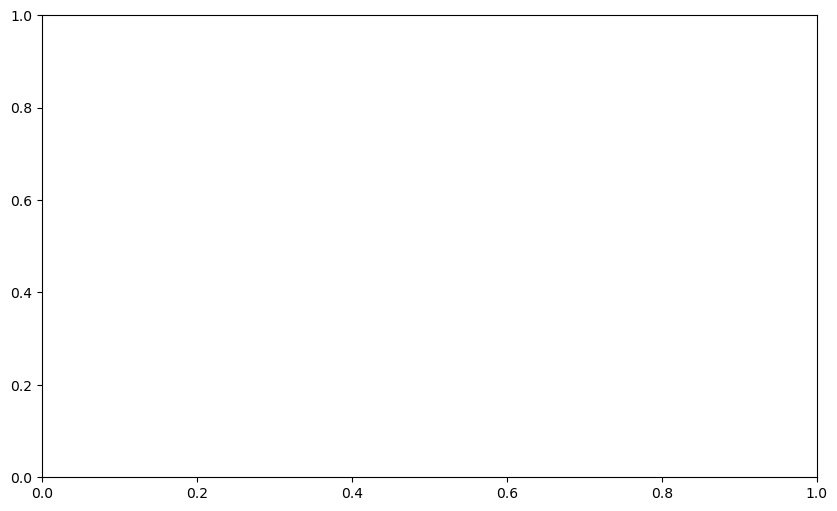

In [18]:
# Case Study 12: Were Pilots Informed? & Prior Warning and Effect of Strike Relation
fig, ax = plt.subplots(figsize=(10, 6))
pilot_informed = data['Warned?'].value_counts()
pilot_informed.plot(kind='bar', ax=ax)
ax.set_title('Were Pilots Informed Before Bird Strikes?')
ax.set_xlabel('Pilot Warned')
ax.set_ylabel('Number of Strikes')
plt.xticks(rotation=45)
save_plot(fig, 'Pilots_Informed_Bird_Strikes.png')
plt.show()

# Case Study 12 (continued): Effect of Strike Relation with Prior Warning
fig, ax = plt.subplots(figsize=(10, 6))
warned_effect = pd.crosstab(data['Warned?'], data['Effect'])
warned_effect.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Effect of Bird Strikes With and Without Prior Warning')
ax.set_xlabel('Pilot Warned')
ax.set_ylabel('Number of Strikes')
plt.xticks(rotation=45)
save_plot(fig, 'Effect_of_Strike_With_Without_Warning.png')
plt.show()